In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = pd.read_csv('../datasets/pulsar-stars/pulsar_stars.csv')

La superposición de algunos centenares de pulsos registrados, da el perfil integrado del pulso, el cual es normalmente estable y característico para cada púlsar.
El perfil integrado está constituido por una gran variedad de pulsos individuales, cada uno de los cuales tiene más de una componente: es la distribución estadística de estas componentes sobre un rango de longitudes, combinado con sus característicos anchos de banda y la distribución de probabilidad de sus intensidades lo que determina la forma repetitiva del perfil integrado.
Cada candidato consta de una selección de parámetros candidatos, que incluyen el período optimizado y la medida de dispersión (DM) del púlsar, así como la relación señal-ruido (SNR) detectada en varios métodos de búsqueda.

In [23]:
NOMBRES_COLUMNAS = {
    'Mean of the integrated profile' : 'media del perfil integrado',
    'Standard deviation of the integrated profile' : 'desviacion estandar del perfil integrado',
    'Excess kurtosis of the integrated profile' : 'exceso de curtosis del perfil integrado',
    'Skewness of the integrated profile' : 'sesgo del perfil integrado',
    'Mean of the DM-SNR curve' : 'media de la curva DM-SNR',
    'Standard deviation of the DM-SNR curve' : 'desviacion estandar de la curva DM-SNR',
    'Excess kurtosis of the DM-SNR curve' : 'exceso de curtosis de la curva DM-SNR',
    'Skewness of the DM-SNR curve' : 'sesgo de la curva DM-SNR',
    'target_class' : 'target_class',
}
data.rename(columns=NOMBRES_COLUMNAS, inplace=True)

In [24]:
data.head(20)

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [25]:
data.describe()

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [26]:
data1 = data[data['target_class']==1]

In [27]:
data1.head(20)

,media del perfil integrado,desviacion estandar del perfil integrado,exceso de curtosis del perfil integrado,sesgo del perfil integrado,media de la curva DM-SNR,desviacion estandar de la curva DM-SNR,exceso de curtosis de la curva DM-SNR,sesgo de la curva DM-SNR,target_class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1
100,123.468750,45.475085,0.345781,0.647415,32.919732,65.094197,1.605538,0.871364,1
110,35.156250,30.237714,4.203475,24.486691,34.101171,62.577395,1.890020,2.572133,1
132,18.117188,29.297670,6.446706,44.601588,50.107860,66.321825,1.456423,1.335182,1
145,44.867188,45.693334,2.888739,8.810673,176.119565,59.737720,-1.785377,2.940913,1
146,26.921875,34.511006,4.709838,24.247400,183.622910,79.932815,-1.326647,0.346712,1


In [28]:
data.columns = [col.strip() for col in data.columns]

In [29]:
data.columns

Index(['media del perfil integrado',
       'desviacion estandar del perfil integrado',
       'exceso de curtosis del perfil integrado', 'sesgo del perfil integrado',
       'media de la curva DM-SNR', 'desviacion estandar de la curva DM-SNR',
       'exceso de curtosis de la curva DM-SNR', 'sesgo de la curva DM-SNR',
       'target_class'],
      dtype='object')

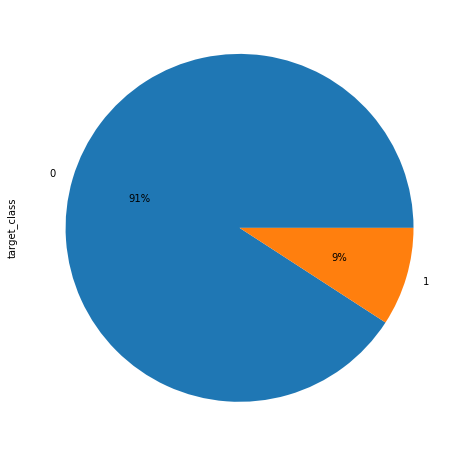

In [30]:
data.target_class.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

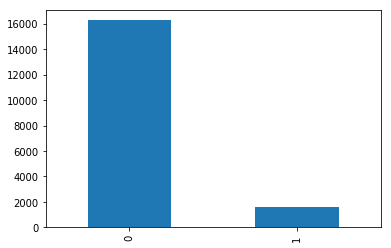

In [31]:
data.target_class.value_counts().plot.bar()

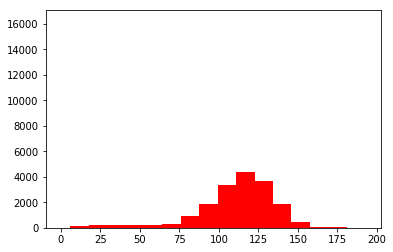

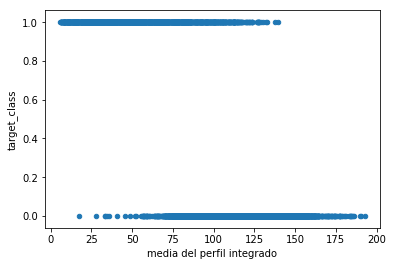

In [33]:
k = int(np.ceil(1 + np.log2(17898)))
colors = ['red', 'blue', 'green', 'black', 'yellow', 'cyan', 'magenta', 'orange']
plt.hist(data['media del perfil integrado'], bins=k, color=colors[0])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x='media del perfil integrado', y="target_class")

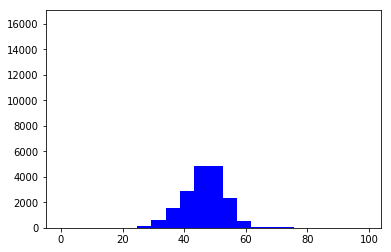

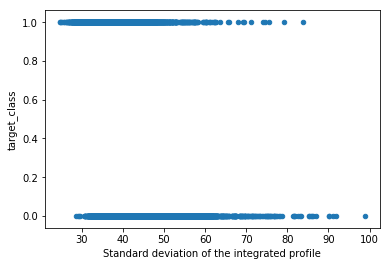

In [12]:
plt.hist(data['Standard deviation of the integrated profile'], bins=k, color=colors[1])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x='Standard deviation of the integrated profile', y="target_class")

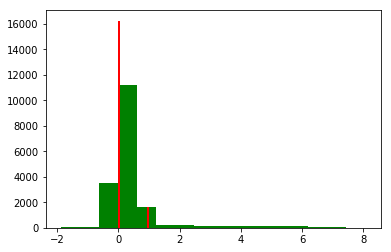

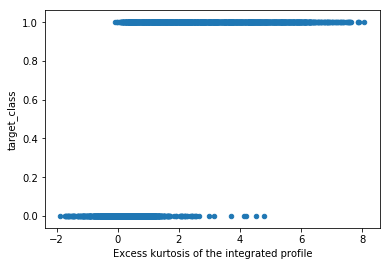

In [13]:
plt.hist(data['Excess kurtosis of the integrated profile'], bins=k, color=colors[2])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Excess kurtosis of the integrated profile", y="target_class")

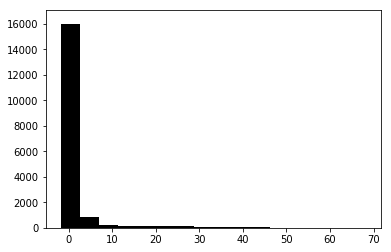

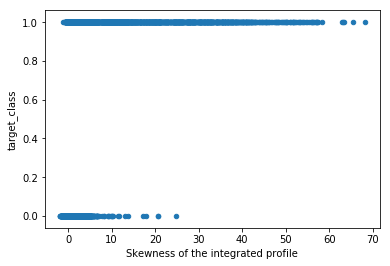

In [14]:
plt.hist(data['Skewness of the integrated profile'], bins=k, color=colors[3])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Skewness of the integrated profile", y="target_class")

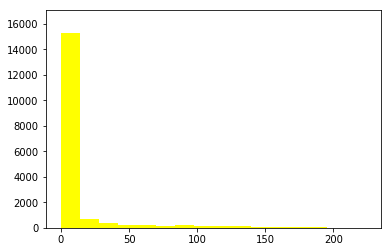

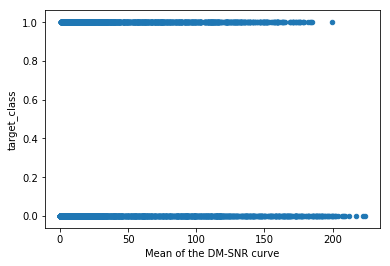

In [15]:
plt.hist(data['Mean of the DM-SNR curve'], bins=k, color=colors[4])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Mean of the DM-SNR curve", y="target_class")

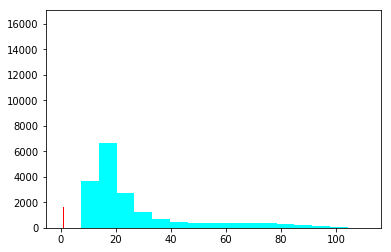

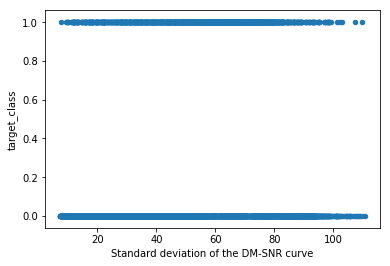

In [16]:
plt.hist(data['Standard deviation of the DM-SNR curve'], bins=k, color=colors[5])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Standard deviation of the DM-SNR curve", y="target_class")

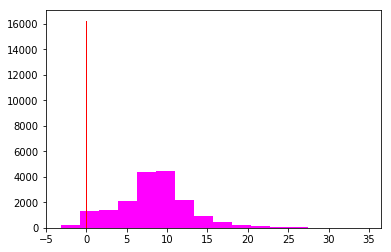

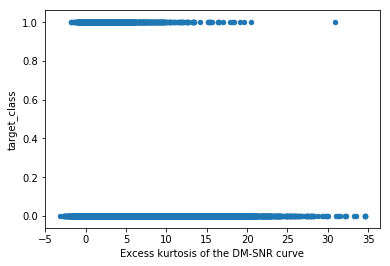

In [17]:
plt.hist(data['Excess kurtosis of the DM-SNR curve'], bins=k, color=colors[6])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Excess kurtosis of the DM-SNR curve", y="target_class")

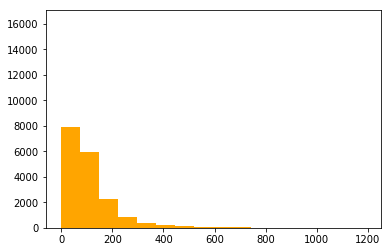

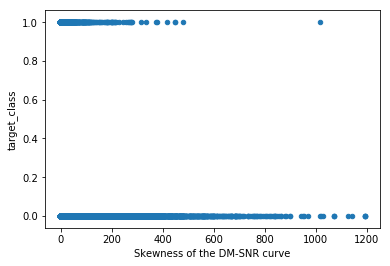

In [18]:
plt.hist(data['Skewness of the DM-SNR curve'], bins=k, color=colors[7])
plt.hist(data['target_class'], bins=k, color=colors[0])
data.plot(kind="scatter", x="Skewness of the DM-SNR curve", y="target_class")

Text(0.5, 1.0, 'CORRELACION ENTRE VARIABLES')

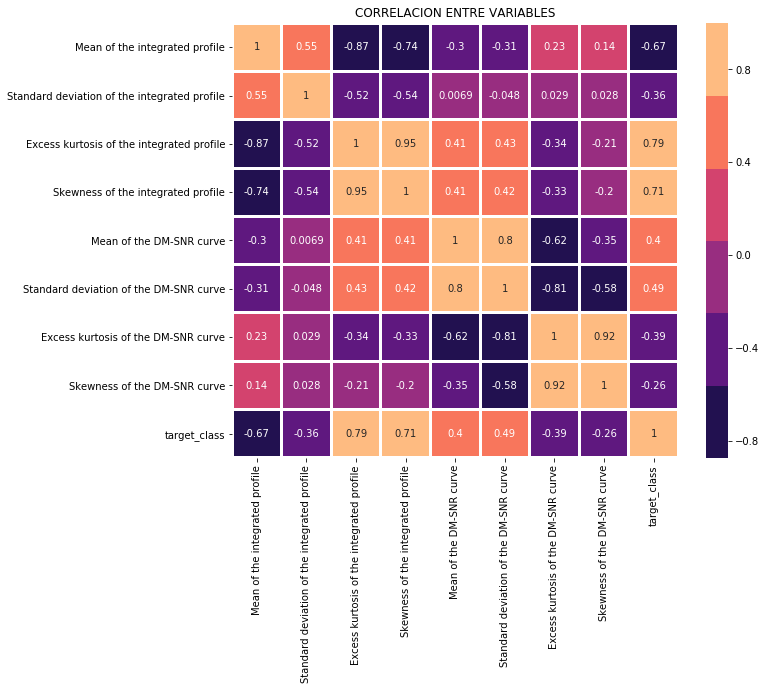

In [19]:
correlation = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k")
plt.title("CORRELACION ENTRE VARIABLES")